In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [60]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

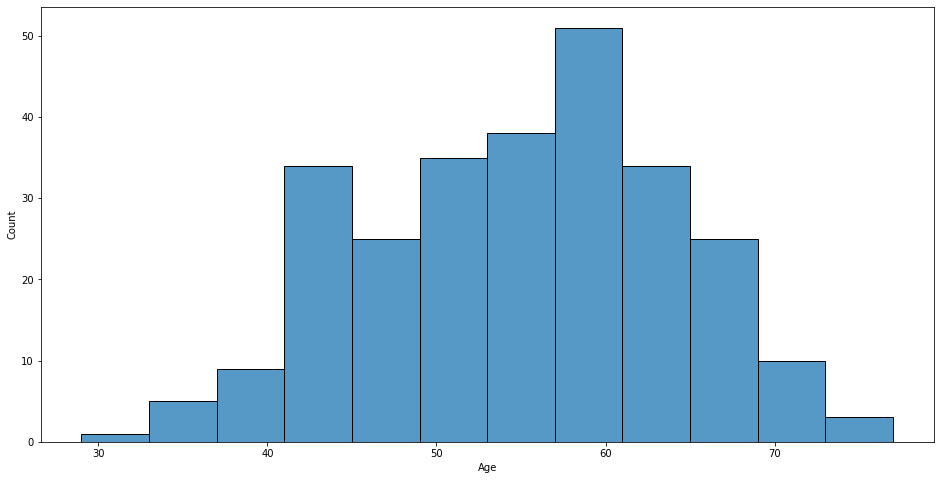

In [61]:
plt.figure(figsize=(16,8))
sn=sns.histplot(df['Age'])
plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


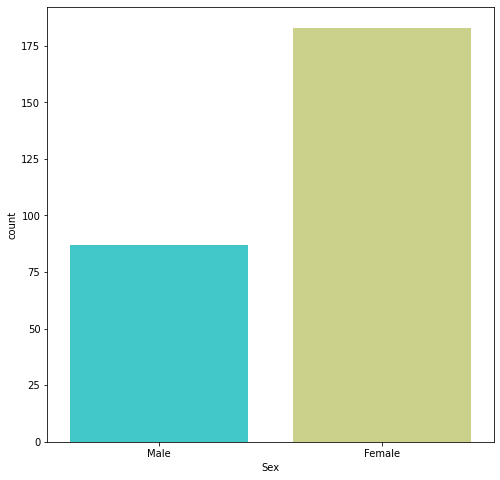

In [62]:
labels = ['Male', 'Female']
plt.figure(figsize=(8,8))
sn=sns.countplot(df['Sex'],palette='rainbow')
plt.xticks([0, 1], labels)
plt.show()

In [63]:
df['Chest pain type'].head()

0    4
1    3
2    2
3    4
4    2
Name: Chest pain type, dtype: int64

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


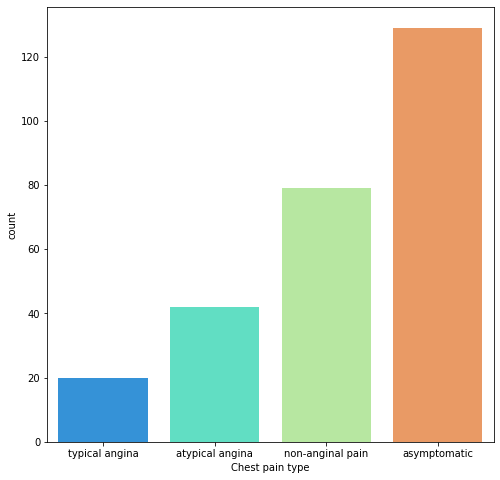

In [64]:
labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
plt.figure(figsize=(8,8))
sn=sns.countplot(df['Chest pain type'],palette='rainbow')
plt.xticks([0,1,2,3], labels)
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])

In [66]:
y=df['Heart Disease']
x=df.drop(['Heart Disease'],axis=1)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

lr = LinearRegression()
lr.fit(x_train, y_train)

predicted = lr.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test, predicted))
r2 = r2_score(y_test, predicted)

print('Root mean squared error: ', RMSE)
print("r2: ", r2)

Root mean squared error:  0.3930985961314432
r2:  0.37416764956392856


In [69]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit=LogisticRegression(max_iter=10000)
logit.fit(x_train, y_train)

predicted_logit = logit.predict(x_test)

LogisticRegressionScore = accuracy_score(predicted_logit, y_test)
print("Logistic Regression score: ", LogisticRegressionScore)

Logistic Regression score:  0.7777777777777778


In [70]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(x_train, y_train)

gauss_pred = gauss.predict(x_test)

gauss_score = accuracy_score(gauss_pred, y_test)


print("Gaussian Naive Bayes score: ", gauss_score)

Gaussian Naive Bayes score:  0.7407407407407407


In [71]:
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier(n_neighbors=2)
KNC.fit(x_train, y_train)

KNC_pred = KNC.predict(x_test)

KNC_accuracy = metrics.accuracy_score(y_test, KNC_pred)

print("KNeighbourClassifier score: ", KNC_accuracy)

KNeighbourClassifier score:  0.6296296296296297


In [51]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

rnd_clf_pred = rnd_clf.predict(x_test)

rnd_clf_accuracy = metrics.accuracy_score(y_test, rnd_clf_pred)
print("RandomForest score: ", rnd_clf_accuracy)

RandomForest score:  0.8148148148148148


In [72]:
data = {'Estimators':['Linear Regression', 
                      'Logistic Regression', 
                      'Gaussian Naive Bayes', 
                      'K-Nearest Neighbor', 
                      'Random Forest', 
                     ],
        "Accuracy":[r2,
                    LogisticRegressionScore,
                    gauss_score,
                    KNC_accuracy,
                    rnd_clf_accuracy,
                   ]
        }

data = pd.DataFrame(data)

data.sort_values('Accuracy')

,Estimators,Accuracy
0,Linear Regression,0.374168
3,K-Nearest Neighbor,0.629630
2,Gaussian Naive Bayes,0.740741
1,Logistic Regression,0.777778
4,Random Forest,0.814815
